In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [2]:
from nltk import ngrams

In [3]:

nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/dahalsulav23/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dahalsulav23/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:

with open('okcupid_descriptions.txt', "r") as file:
    # Read all lines from the file into a list
    lines = file.readlines()

for line in lines:
    line.strip('\n')
print(lines[0])

about me i would love to think that i was some some kind of intellectual either the dumbest smart guy or the smartest dumb guy cant say i can tell the difference i love to talk about ideas and concepts i forge odd metaphors instead of reciting cliches like the simularities between a friend of mines house and an underwater salt mine my favorite word is salt by the way weird choice i know to me most things in life are better as metaphors i seek to make myself a little better everyday in some productively lazy way got tired of tying my shoes considered hiring a five year old but would probably have to tie both of our shoes decided to only wear leather shoes dress shoes about you you love to have really serious really deep conversations about really silly stuff you have to be willing to snap me out of a light hearted rant with a kiss you dont have to be funny but you have to be able to make me laugh you should be able to bend spoons with your mind and telepathically make me smile while i a

In [5]:
self_descriptions = lines
stop_words = set(stopwords.words('english'))

# Tokenizing and preprocessing each self-description
preprocessed_descriptions = []
for description in self_descriptions:
    words = word_tokenize(description)
    filtered_words = [word.lower() for word in words if word.lower() not in stop_words]
    preprocessed_descriptions.append(filtered_words)

In [6]:
# Combining all preprocessed descriptions into a single list
all_words = [word for description in preprocessed_descriptions for word in description]

# Calculating word frequencies
fdist = FreqDist(all_words)

# Getting the most common words and their frequencies
most_common_words = fdist.most_common(10)
print(most_common_words)

[('im', 207939), ('like', 135081), ('love', 119379), ('good', 88963), ('friends', 81932), ('music', 81727), ('people', 76807), ('life', 70568), ('time', 69004), ('things', 64764)]


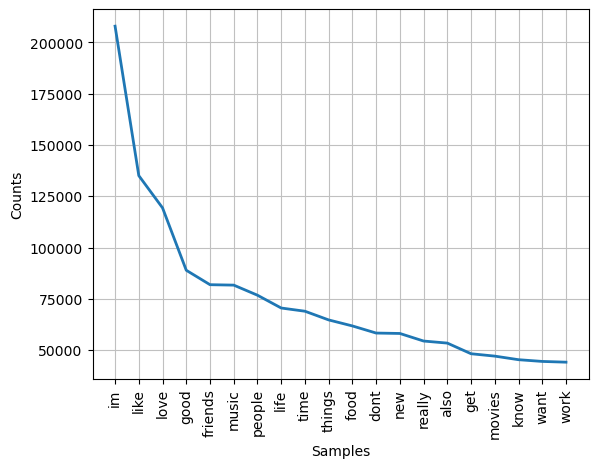

In [7]:
import matplotlib.pyplot as plt

# Plotting the most common words
fdist.plot(20, cumulative=False)
plt.show()

#We do get the most common words but the context is missing. also it includes common words like im, also, get which do not provide any unique insight. Therefore it is better to see some context by taking a look at most common unique words together to gain more insight.

In [8]:
#These represent the frequently used words start with 2 until 5 words.
bi_grams = list(ngrams(all_words, 2))
tri_grams = list(ngrams(all_words, 3))
quarte_grams = list(ngrams(all_words, 4))
cinq_grams  = list(ngrams(all_words, 5))

In [9]:
bi_gram_fdist = FreqDist(bi_grams)
tri_gram_fdist = FreqDist(tri_grams)
quarte_gram_fdist = FreqDist(quarte_grams)
cinq_gram_fdist = FreqDist(cinq_grams)

# Get the most common bi-grams and tri-grams and their frequencies
most_common_bi_grams = bi_gram_fdist.most_common(20)
most_common_tri_grams = tri_gram_fdist.most_common(20)
most_common_quarte_grams = quarte_gram_fdist.most_common(20)
most_common_cinq_grams = cinq_gram_fdist.most_common(20)
print("Most Common Bi-Grams:")
print(most_common_bi_grams)

print("\nMost Common Tri-Grams:")
print(most_common_tri_grams)

print("\nMost Common Quarte-Grams:")
print(most_common_quarte_grams)

print("\nMost Common Cinq-Grams:")
print(most_common_cinq_grams)

Most Common Bi-Grams:
[(('san', 'francisco'), 11941), (('bay', 'area'), 10138), (('family', 'friends'), 9175), (('sense', 'humor'), 8517), (('friends', 'family'), 7641), (('new', 'things'), 7212), (('im', 'pretty'), 7060), (('pretty', 'much'), 6653), (('im', 'really'), 6648), (('im', 'looking'), 6456), (('im', 'also'), 6405), (('would', 'like'), 6074), (('really', 'good'), 5811), (('dont', 'know'), 5656), (('im', 'good'), 5446), (('new', 'people'), 5229), (('get', 'know'), 5180), (('good', 'food'), 5020), (('making', 'people'), 5018), (('im', 'going'), 4719)]

Most Common Tri-Grams:
[(('making', 'people', 'laugh'), 3182), (('meeting', 'new', 'people'), 2437), (('spend', 'lot', 'time'), 2433), (('im', 'really', 'good'), 2287), (('trying', 'new', 'things'), 1991), (('meet', 'new', 'people'), 1852), (('pretty', 'much', 'anything'), 1709), (('sunshine', 'spotless', 'mind'), 1488), (('eternal', 'sunshine', 'spotless'), 1466), (('big', 'bang', 'theory'), 1444), (('try', 'new', 'things'), 140

#We see that we can get more insight now with words like sense humour i.e. sense of humour, meet new people. It is relatively insightful but it would be better if we could better visualize it.

In [10]:
from wordcloud import WordCloud

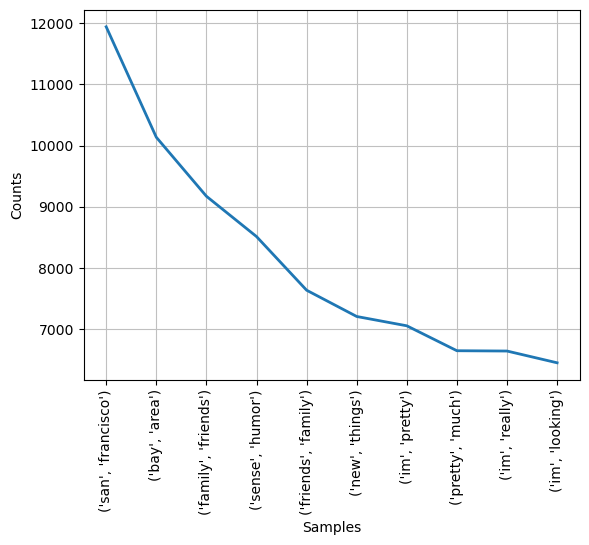

In [11]:
plt.clf()
bi_gram_fdist.plot(10, cumulative=False)
#plt.title('Most Common Bi-Grams')
plt.show()


The context is slightly clearer. And the frequency of words are also very relevant. But we can do better. Let's try tri grams.

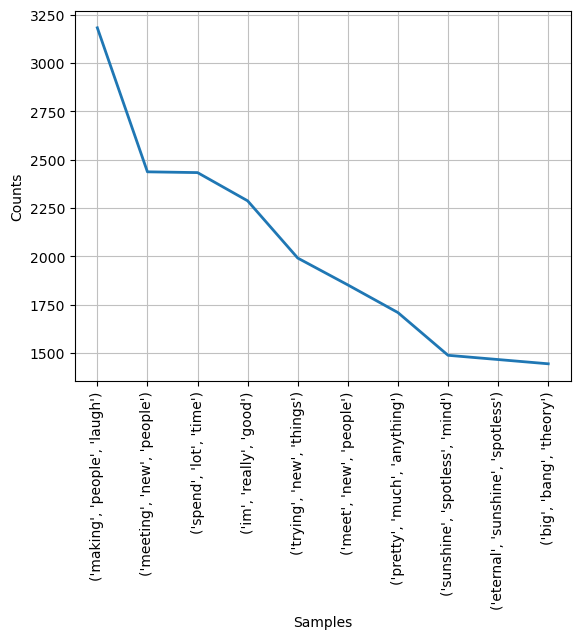

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
# Plotting the most common tri-grams
tri_gram_fdist.plot(10, cumulative=False)
#plt.title('Most Common Tri-Grams')
#plt.show()

The context is more or less clear. making people laugh, meeting new people, trying new things describes what people like to do. Sunshine spotless mind and big bang theory describe movies and tv shows people like.

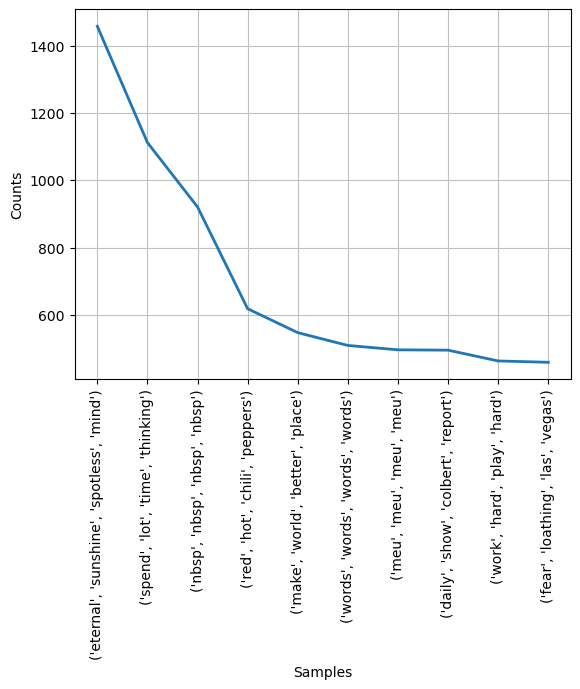

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [13]:
quarte_gram_fdist.plot(10, cumulative=False)
#plt.title('Most Common Quarte-Grams')
#plt.show()


The data we receive with four words are slightly unuseful than when we have used 3 words.

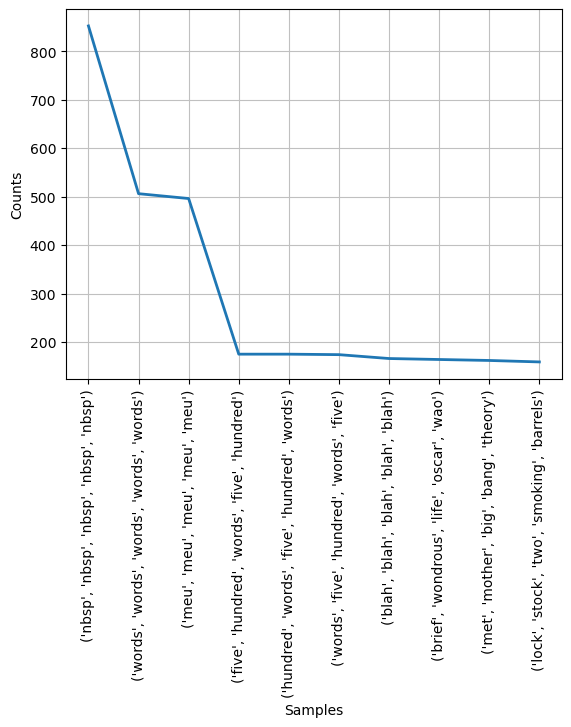

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [14]:
plt.clf()
cinq_gram_fdist.plot(10, cumulative=False)
#plt.title('Most Common Cinq-Grams')
#plt.show()

For five words the insight is usless.

I want to divide the descriptions into two separate lists and perforn ngrams for 4 and 5 words respectively to see if the insights are very much impacted by common words used in the first half or second half and hope the results will be slightly more insightful.

In [15]:
first_half = all_words[0:int((len(all_words))/2)]
second_half = all_words[int(((len(all_words))/2)+1):int(len(all_words))]

In [16]:
quarte_grams1= list(ngrams(first_half, 4))
cinq_grams1  = list(ngrams(first_half, 5))

In [17]:
quarte_gram_fdist1 = FreqDist(quarte_grams1)
cinq_gram_fdist1 = FreqDist(cinq_grams1)

In [18]:
most_common_quarte_grams1 = quarte_gram_fdist1.most_common(20)
most_common_cinq_grams1 = cinq_gram_fdist1.most_common(20)

In [19]:
print("\nMost Common Quarte-Grams1:")
print(most_common_quarte_grams1)

print("\nMost Common Cinq-Grams1:")
print(most_common_cinq_grams1)


Most Common Quarte-Grams1:
[(('nbsp', 'nbsp', 'nbsp', 'nbsp'), 921), (('eternal', 'sunshine', 'spotless', 'mind'), 722), (('spend', 'lot', 'time', 'thinking'), 578), (('meu', 'meu', 'meu', 'meu'), 497), (('words', 'words', 'words', 'words'), 415), (('red', 'hot', 'chili', 'peppers'), 323), (('make', 'world', 'better', 'place'), 287), (('daily', 'show', 'colbert', 'report'), 255), (('work', 'hard', 'play', 'hard'), 226), (('fear', 'loathing', 'las', 'vegas'), 224), (('dont', 'watch', 'much', 'tv'), 208), (('making', 'people', 'feel', 'comfortable'), 194), (('one', 'flew', 'cuckoos', 'nest'), 181), (('looking', 'meet', 'new', 'people'), 180), (('love', 'meeting', 'new', 'people'), 169), (('im', 'also', 'really', 'good'), 161), (('one', 'hundred', 'years', 'solitude'), 141), (('love', 'trying', 'new', 'things'), 141), (('first', 'thing', 'people', 'notice'), 140), (('scott', 'pilgrim', 'vs', 'world'), 134)]

Most Common Cinq-Grams1:
[(('nbsp', 'nbsp', 'nbsp', 'nbsp', 'nbsp'), 852), (('me

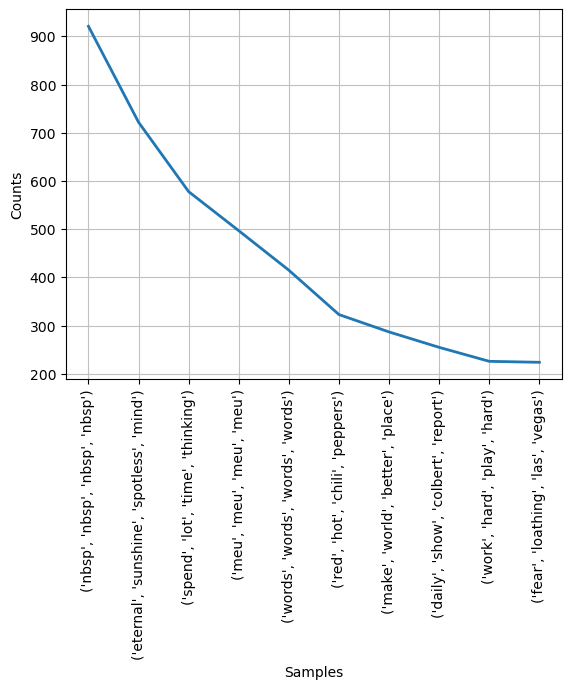

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
quarte_gram_fdist1.plot(10, cumulative=False)
#plt.title('Most Common Quarte-Grams1')
#plt.show()


The ngram test for the first half of the description with four words is no better.

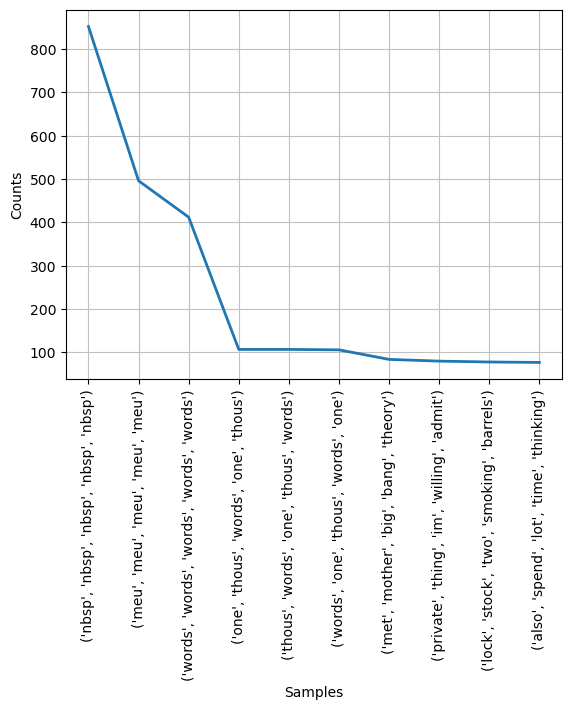

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
cinq_gram_fdist1.plot(10, cumulative=False)

The ngram test for the first half of the description with five words is no better either.

Let's see how the second half fares.

In [22]:
quarte_grams2= list(ngrams(second_half, 4))
cinq_grams2= list(ngrams(second_half, 5))

quarte_gram_fdist2 = FreqDist(quarte_grams2)
cinq_gram_fdist2 = FreqDist(cinq_grams2)

most_common_quarte_grams2 = quarte_gram_fdist2.most_common(20)
most_common_cinq_grams2 = cinq_gram_fdist2.most_common(20)

In [23]:
print("\nMost Common Quarte-Grams2:")
print(most_common_quarte_grams2)

print("\nMost Common Cinq-Grams2:")
print(most_common_cinq_grams2)


Most Common Quarte-Grams2:
[(('eternal', 'sunshine', 'spotless', 'mind'), 735), (('spend', 'lot', 'time', 'thinking'), 534), (('red', 'hot', 'chili', 'peppers'), 296), (('make', 'world', 'better', 'place'), 261), (('daily', 'show', 'colbert', 'report'), 241), (('work', 'hard', 'play', 'hard'), 238), (('fear', 'loathing', 'las', 'vegas'), 236), (('dont', 'watch', 'much', 'tv'), 222), (('looking', 'meet', 'new', 'people'), 202), (('love', 'meeting', 'new', 'people'), 195), (('making', 'people', 'feel', 'comfortable'), 190), (('five', 'hundred', 'words', 'five'), 175), (('hundred', 'words', 'five', 'hundred'), 175), (('words', 'five', 'hundred', 'words'), 175), (('im', 'also', 'really', 'good'), 164), (('one', 'flew', 'cuckoos', 'nest'), 156), (('first', 'thing', 'people', 'notice'), 155), (('one', 'hundred', 'years', 'solitude'), 144), (('things', 'could', 'never', 'without'), 142), (('blah', 'blah', 'blah', 'blah'), 136)]

Most Common Cinq-Grams2:
[(('five', 'hundred', 'words', 'five',

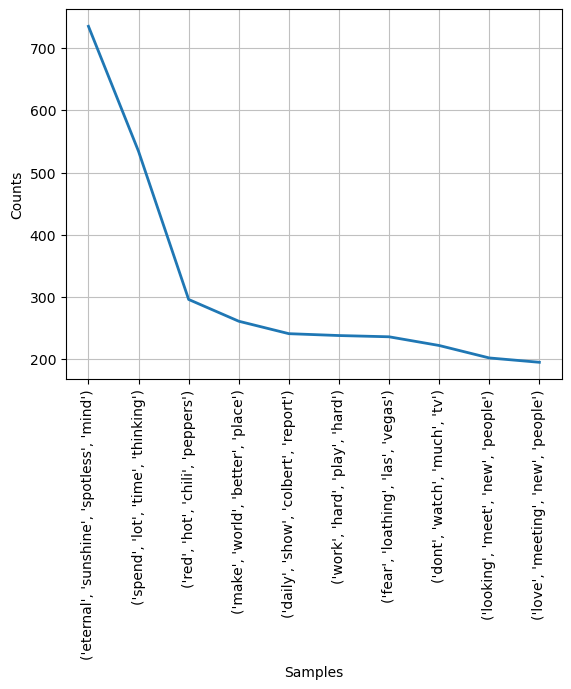

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [24]:
quarte_gram_fdist2.plot(10, cumulative=False)
#plt.title('Most Common Quarte-Grams')
#plt.show()


The ngrams test with four words of the second half is slightly more insightful and the frequency is somewhat relevant. 

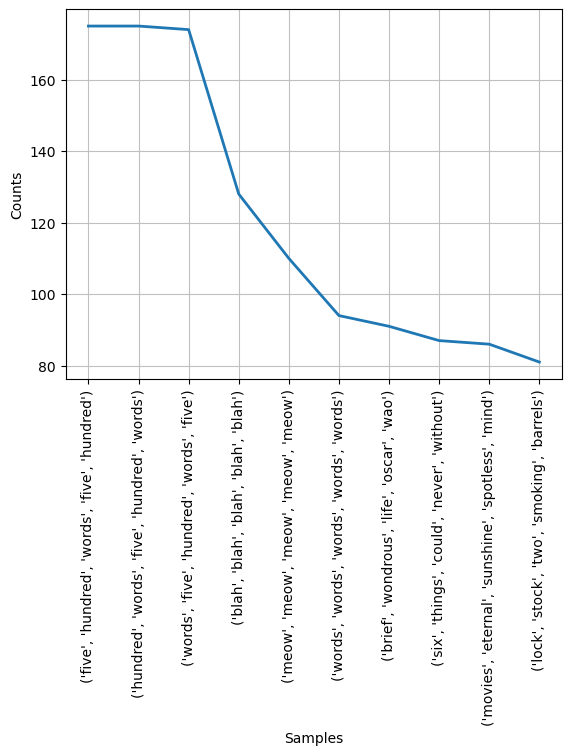

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
cinq_gram_fdist2.plot(10, cumulative=False)

The n gram test with 5 words for the second half is not insightful at all.

The n gram test with three words turns out to be optimal to gain insight into how people like to describe themselves and what they like to do.